## Importing all the required libraries and packages

In [1]:
import numpy as np
import cv2
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import matplotlib

from sklearn.model_selection import train_test_split
import random
from glob import glob
import fnmatch
from keras.models import Sequential

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
from tensorflow.keras import regularizers
from keras.utils import conv_utils

from tensorflow import keras
from tensorflow.keras.models import *
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.optimizers import *
from keras.models import load_model, Model
from tensorflow.keras import regularizers
from keras.utils import conv_utils

from tensorflow.keras.utils import plot_model

## Loading the csv file

In [2]:
import pandas as pd
data_path = "C:\\Users\\PRAJWAL S RAO\\Downloads\\Handwritten\\A_Z Handwritten Data.csv"

data = pd.read_csv(data_path)
data = np.array(data)
data.shape

(372450, 785)

## Creating label vector reshaping the data from csv file to image and performing one hot encoding

In [3]:
Labels =[]
Label_vector = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
Aplhabets = []
no_of_classes = 26
for i in range(data.shape[0]):
    aplha_array = data[i,1:]
    Aplhabets_image = np.reshape(aplha_array,(28,28,1))
    Aplhabets.append(Aplhabets_image)
    label_vector = np.zeros(no_of_classes)
    label_vector[int(data[i,0])] = 1
    Labels.append(label_vector)
    
Aplhabets = np.array(Aplhabets)/255
Labels = np.array(Labels)


## Dividing the data into testing and training images
### 80-20 was the split for training and testing

In [4]:
X_train, X_test, y_train, y_test = train_test_split(Aplhabets, Labels, test_size=0.20, random_state=42,stratify=Labels)

### Plotting the distibution of images present per class

In [5]:
y_labels=[]
for i in range(y_train.shape[0]):
    y_labels.append(np.argmax(y_train[i]))

unique_values, num_unique_values = np.unique(y_labels, return_counts=True)

new_list = [chr(65+i) for i in unique_values]

plt.bar(new_list,num_unique_values)
plt.xlabel("Alphabets")
plt.ylabel("Number of images")

Text(0, 0.5, 'Number of images')

### Developing our CNN model by having desired number of of convolution, maxpooling and dense layer

In [6]:
model = Sequential()

model.add(Conv2D(filters=3, kernel_size=(5,5), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='same'))
model.add(Conv2D(filters=9, kernel_size=(5,5), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='same'))
model.add(Conv2D(filters=20, kernel_size=(5,5), padding='valid', activation='relu'))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(26, activation='softmax'))
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 3)         78        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 3)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 9)         684       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 9)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 20)          4520      
                                                                 
 flatten (Flatten)           (None, 20)                0

### Training the model for 25 epochs and tuning the hyperparameters

In [7]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=Adam(learning_rate=5e-4))
history_performance = model.fit(X_train, y_train, epochs = 25,validation_split = 0.1)

tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
)

Epoch 1/25
8381/8381 [==============================] - 61s 7ms/step - loss: 0.3815 - accuracy: 0.8874 - val_loss: 0.1717 - val_accuracy: 0.9504
Epoch 2/25
8381/8381 [==============================] - 55s 7ms/step - loss: 0.1494 - accuracy: 0.9559 - val_loss: 0.1271 - val_accuracy: 0.9631
Epoch 3/25
8381/8381 [==============================] - 57s 7ms/step - loss: 0.1125 - accuracy: 0.9670 - val_loss: 0.1007 - val_accuracy: 0.9701
Epoch 4/25
8381/8381 [==============================] - 64s 8ms/step - loss: 0.0942 - accuracy: 0.9723 - val_loss: 0.0914 - val_accuracy: 0.9724
Epoch 5/25
8381/8381 [==============================] - 61s 7ms/step - loss: 0.0842 - accuracy: 0.9751 - val_loss: 0.0767 - val_accuracy: 0.9775
Epoch 6/25
8381/8381 [==============================] - 55s 7ms/step - loss: 0.0762 - accuracy: 0.9774 - val_loss: 0.0738 - val_accuracy: 0.9786
Epoch 7/25
8381/8381 [==============================] - 59s 7ms/step - loss: 0.0705 - accuracy: 0.9792 - val_loss: 0.0731 - val_ac

### Checking the F1 score, Recall and Precision of the trained model

In [8]:
import sklearn
predictions = model.predict(X_test)

predictions_lst=[]
for i in predictions:
    predictions_lst.append(np.argmax(i))

y_labels=[]
for i in range(y_test.shape[0]):
    y_labels.append(np.argmax(y_test[i]))
    
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report, ConfusionMatrixDisplay

print(classification_report(y_labels,predictions_lst))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2774
           1       0.98      0.97      0.98      1734
           2       0.98      0.99      0.99      4682
           3       0.97      0.92      0.95      2027
           4       0.99      0.98      0.98      2288
           5       0.97      0.97      0.97       233
           6       0.92      0.98      0.95      1152
           7       0.97      0.97      0.97      1444
           8       0.94      0.98      0.96       224
           9       0.97      0.96      0.96      1699
          10       0.98      0.95      0.96      1121
          11       0.98      0.98      0.98      2317
          12       0.99      0.98      0.99      2467
          13       0.99      0.99      0.99      3802
          14       0.99      0.98      0.98     11565
          15       0.99      0.99      0.99      3868
          16       0.87      0.97      0.92      1162
          17       0.99    

### Displaying the confusion matriz

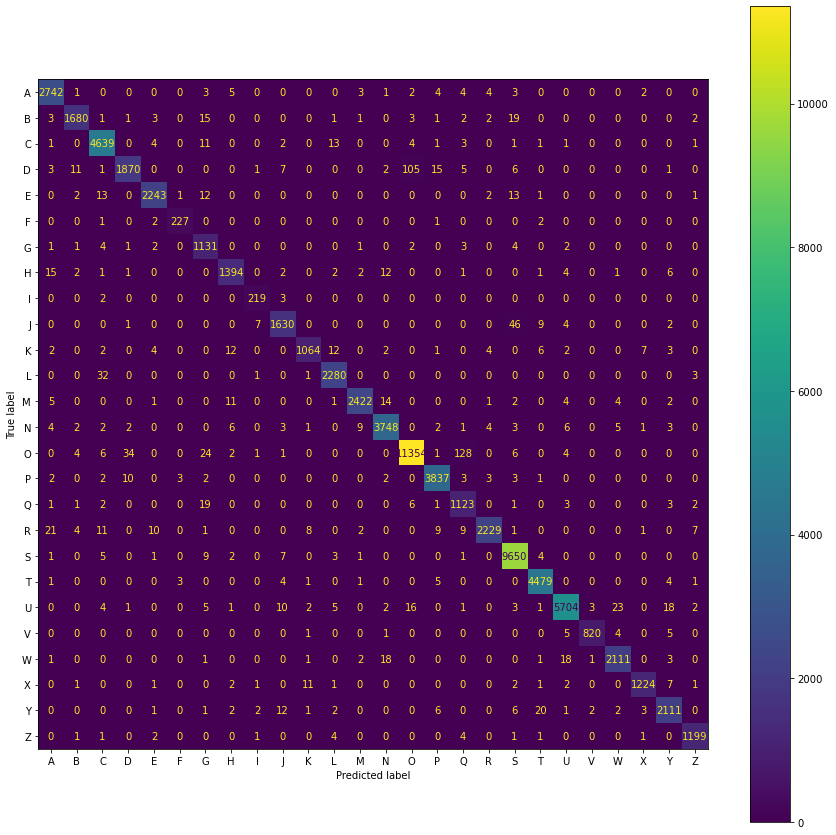

In [9]:
cm = confusion_matrix(y_labels, predictions_lst) #, labels=Label_vector)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Label_vector)
matplotlib.rcParams['figure.figsize'] = (15, 15)
disp.plot()
plt.show()
matplotlib.pyplot.rcdefaults()

### Displaying the loss and accuracy over 25 epochs

In [10]:
loss = history_performance.history["loss"]
val_loss = history_performance.history["val_loss"]

accuracy = history_performance.history["accuracy"]
val_accuracy = history_performance.history["val_accuracy"]

plt.figure(1)
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(accuracy, color='r', label='accuracy')
plt.plot(val_accuracy, color='g', label='val_accuracy')
plt.xlabel("Number of epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy plot")
plt.legend()

plt.subplot(1,2,2)
plt.plot(loss, color='r', label='loss')
plt.plot(val_loss, color='g', label='val_loss')
plt.xlabel("Number of epochs")
plt.ylabel("Loss")
plt.title("Loss plot")
plt.legend()

<Figure size 640x480 with 0 Axes>

### Function to convert a fraction to binary

In [11]:
def DtoB(num,dataWidth,fracBits):  #funtion for converting into two's complement format
    if num >= 0:
        num = num * (2**fracBits)
        num = int(num)
        d = num
    else:
        num = -num
        num = num * (2**fracBits)  #number of fractional bits
        num = int(num)
        if num == 0:
            d = 0
        else:
            d = 2**dataWidth - num
    d = bin(d)[2:]
    return d

### Extracting the weights and biases layer by layer, converting them to binary and storing them seperatly in .mif format 
#### Based on the maximum and minimum value we can change the bit resolution for integer and fractional part of weights and biases

In [12]:
output_path = "C:\\PRAJWAL_S_RAO\\NITK\\ACADEMICS\\MAJOR PROJECT\\Weights&Bias"

Data_Width = 16
Weight_Frac_Width = 13

Bias_Data_Width = 32
Bias_Frac_Width = 26

Weight_Int_Width = Data_Width - Weight_Frac_Width
Bias_Int_Width = Bias_Data_Width - Bias_Frac_Width

for layer_number in range(len(model.layers)):
    
    if model.layers[layer_number].__class__.__name__ == "Conv2D":
        if not os.path.exists(output_path + "\Layer_" + str(layer_number)):
            os.makedirs(output_path + "\Layer_" + str(layer_number))
            layer_path = output_path + "\Layer_" + str(layer_number)

        if not os.path.exists(layer_path + "\Weights"):
            os.makedirs(layer_path + "\Weights")
            weight_path = layer_path + "\Weights"
    
        if not os.path.exists(layer_path + "\Bias"):
            os.makedirs(layer_path + "\Bias")
            bias_path = layer_path + "\Bias"
            
        weights = np.array(model.layers[layer_number].get_weights()[0].tolist())
        bias = np.array(model.layers[layer_number].get_weights()[1].tolist())
        print("Layer no ",layer_number)
        print("Maximum bias", np.max(bias))
        print("Minimum bias", np.min(bias))
        print("Maximum weights", np.max(weights))
        print("Minimum weights", np.min(weights))
        
        for filter_number in range(weights.shape[3]):
            for channel_number in range(weights.shape[2]):
                
                fi = '\Filter_number_'+str(filter_number)+'_Channel_number_'+str(channel_number)+'.mif'
                f = open(weight_path+fi,'w')
                
                for line_number in range(weights.shape[1]):
                    for index_number in range(weights.shape[0]):
                        weight_value = weights[line_number, index_number, channel_number, filter_number]
                        
                        if weight_value > 2**(Weight_Int_Width - 1):
                            weight_value = 2**(Weight_Int_Width - 1) - 2**(- Weight_Frac_Width)
                        elif weight_value < -2**(Weight_Int_Width - 1):
                            weight_value = -2**(Weight_Int_Width - 1)
                        p = DtoB(weight_value, Data_Width, Weight_Frac_Width)
                    
                        f.write(p+'\n')
        
 
        fi = "\Layer_" + str(layer_number) + "_Bias.mif" 
        f = open(bias_path+fi,'w')
        
        for bias_number in range(bias.shape[0]):
            bias_value = bias[bias_number]
            
            if bias_value > 2**(Bias_Int_Width - 1):
                bias_value = 2**(Bias_Int_Width - 1)-2**(-Bias_Frac_Width)
                
            elif bias_value < -2**(Bias_Int_Width - 1):
                bias_value = -2**(Bias_Int_Width - 1)
                
            p = DtoB(bias_value,Bias_Data_Width,Bias_Frac_Width)
            
            f.write(p + '\n')
        
    elif model.layers[layer_number].__class__.__name__ == "Dense":
        
        weights = np.array(model.layers[layer_number].get_weights()[0].tolist())
        bias = np.array(model.layers[layer_number].get_weights()[1].tolist())
        print("Layer no ",layer_number)
        print("Maximum bias", np.max(bias))
        print("Minimum bias", np.min(bias))
        print("Maximum weights", np.max(weights))
        print("Minimum weights", np.min(weights))
        
        if not os.path.exists(output_path + "\Layer_" + str(layer_number)):
            os.makedirs(output_path + "\Layer_" + str(layer_number))
            layer_path = output_path + "\Layer_" + str(layer_number)

        if not os.path.exists(layer_path + "\Weights"):
            os.makedirs(layer_path + "\Weights")
            weight_path = layer_path + "\Weights"

        if not os.path.exists(layer_path + "\Bias"):
            os.makedirs(layer_path + "\Bias")
            bias_path = layer_path + "\Bias"
        
        for neuron_number in range(weights.shape[1]):
            fi = '\\Neuron_number_' + str(neuron_number)+'.mif'
            f = open(weight_path+fi,'w')
            for weight_number in range(weights.shape[0]):
                weight_value = weights[weight_number, neuron_number]
                if weight_value > 2**(Weight_Int_Width - 1):
                    weight_value = 2**(Weight_Int_Width - 1) - 2**(- Weight_Frac_Width)
                elif weight_value < -2**(Weight_Int_Width - 1):
                    weight_value = -2**(Weight_Int_Width - 1)
                p = DtoB(weight_value, Data_Width, Weight_Frac_Width)

                f.write(p+'\n')
                
                
        fi = "\Layer_" + str(layer_number) + "_Bias.mif" 
        f = open(bias_path+fi,'w')
        
        for bias_number in range(bias.shape[0]):
            bias_value = bias[bias_number]
            
            if bias_value > 2**(Bias_Int_Width - 1):
                bias_value = 2**(Bias_Int_Width - 1)-2**(-Bias_Frac_Width)
                
            elif bias_value < -2**(Bias_Int_Width - 1):
                bias_value = -2**(Bias_Int_Width - 1)
                
            p = DtoB(bias_value,Bias_Data_Width,Bias_Frac_Width)
            
            f.write(p + '\n')
f.close()

NameError: name 'layer_path' is not defined

### Some images and it's prediction

In [ ]:
random_int = np.random.randint(1,372450,9) 
pred_vect = []
in_vect = [] 
for i in range(random_int.shape[0]):
    image = Aplhabets[random_int[i]]
    test_image = np.expand_dims(image, axis = 0)
    predicted_value = model.predict(test_image)
    pred_vect.append(Label_vector[np.argmax(predicted_value)])
    in_vect.append(image)

plt.figure(1)
plt.figure(figsize=(7,7))
plt.subplot(3,3,1)
plt.imshow(in_vect[0], cmap = 'gray')
plt.xticks([])
plt.yticks([])
plt.title("Prediction is {}".format(pred_vect[0]))

plt.subplot(3,3,2)
plt.imshow(in_vect[1], cmap = 'gray')
plt.xticks([])
plt.yticks([])
plt.title("Prediction is {}".format(pred_vect[1]))
           
plt.subplot(3,3,3)
plt.imshow(in_vect[2], cmap = 'gray')
plt.xticks([])
plt.yticks([])
plt.title("Prediction is {}".format(pred_vect[2]))

plt.subplot(3,3,4)
plt.imshow(in_vect[3], cmap = 'gray')
plt.xticks([])
plt.yticks([])
plt.title("Prediction is {}".format(pred_vect[3]))

plt.subplot(3,3,5)
plt.imshow(in_vect[4], cmap = 'gray')
plt.xticks([])
plt.yticks([])
plt.title("Prediction is {}".format(pred_vect[4]))

plt.subplot(3,3,6)
plt.imshow(in_vect[5], cmap = 'gray')
plt.xticks([])
plt.yticks([])
plt.title("Prediction is {}".format(pred_vect[5]))

plt.subplot(3,3,7)
plt.imshow(in_vect[6], cmap = 'gray')
plt.xticks([])
plt.yticks([])
plt.title("Prediction is {}".format(pred_vect[6]))

plt.subplot(3,3,8)
plt.imshow(in_vect[7], cmap = 'gray')
plt.xticks([])
plt.yticks([])
plt.title("Prediction is {}".format(pred_vect[7]))

plt.subplot(3,3,9)
plt.imshow(in_vect[8], cmap = 'gray')
plt.xticks([])
plt.yticks([])
plt.title("Prediction is {}".format(pred_vect[8]))

### Checking the maximum and minimum value which can be achieved when testing an image.

In [ ]:
image = Aplhabets[2686]
test_image = np.expand_dims(image, axis = 0)
predicted_value = model.predict(test_image)
print("Prediction is ",Label_vector[np.argmax(predicted_value)])
plt.imshow(image, cmap = 'gray')

extractor = keras.Model(inputs=model.inputs,
                        outputs=[layer.output for layer in model.layers])
features = extractor(test_image)  

for i in range(len(model.layers)):
    data = np.array(features[i])
    print("Layer no ", i)
    print("Maximum value is ", np.max(data))
    print("Minimum value is ",np.min(data))